# Superstore Dataset Analysis 

This notebook is part of the Introduction to Computer Science & Applications group assignment.

It covers:
- **Q1: Introduction to the Superstore dataset**
- **Q6: Hypothesis Testing (ANOVA & Chi-Square)**

Notebook by Lazary


Dataset:  
[Kaggle – Superstore Dataset (Final Version)](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final)





## 1. Introduction to the Superstore Dataset

The Superstore dataset contains detailed records of customer orders made between **2014 and 2017**.  
It is a popular retail dataset used for data analysis, visualization, and statistical modelling.

The dataset includes:

- Order information (Order ID, Order Date, Ship Date, Ship Mode)
- Customer details (Customer ID, Name, Segment)
- Location data (Country, City, State, Postal Code, Region)
- Product information (Category, Sub-Category, Product Name)
- Sales metrics (Sales, Quantity, Discount, Profit)

The goal of this project is to:
The goal of this project is to complete the 10 statistical analysis sections assigned for this course:

1. **Descriptive Statistics** – Summarize and understand dataset variables  
2. **Correlation & Relationships** – Explore how variables relate  
3. **Comparative Analysis** – Compare groups for differences  
4. **Regression Analysis** – Model numeric predictions  
5. **Time-Series Analysis** – Analyze trends over time  
6. **Hypothesis Testing (ANOVA & Chi-Square)** – Test differences and associations  
7. **Outlier Analysis** – Detect and interpret extreme values  
8. **Categorical Data Analysis** – Explore patterns in non-numeric data  
9. **Forecasting** – Predict future sales patterns  
10. **Dashboard & Summary** – Visualize results and summarize findings
11. **Understand the structure of the dataset**   
12. Draw **meaningful conclusions** for retail business decision-making


## 2. Dataset Structure 

In this section, we explore the **overall structure of the Superstore dataset** to understand the types of data we are working with and prepare it for further analysis.

### What we did:
- Checked the **number of rows and columns** using `df.shape` to understand dataset size.  
- Used `df.info()` to examine **column names, data types, and non-null counts**, ensuring there are no missing values.  
- Observed **numeric vs categorical columns**, which helps decide which analysis methods to use later.  
- Ran `df.head()` to preview the first few rows and get a sense of the data content.  
- Identified columns relevant for **sales, profit, discounts, and other business insights**.  

> **Purpose:** Understanding the dataset structure is a critical first step. It ensures we know what data is available, its types, and potential issues such as outliers or unusual values before moving on to statistical analysis and visualization.


In [17]:
#pandas for data manipulation and analysis and pd as alias for pandas
import pandas as pd  
# load dataset with latin1 encoding to handle special characters and into a pandas DataFrame
df = pd.read_csv("../data/Superstore.csv", encoding="latin1")
# Show first 5 rows by default
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
# show the shape of the DataFrame (number of rows and columns)
df.shape


(9994, 21)

In [19]:
# display column names of the DataFrame
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
# show summary information about the DataFrame including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [21]:
# show statistical summary of numerical columns in the DataFrame like count, mean, std, min, max, and percentiles
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## 3. Data Cleaning & Preparation

In this step, we prepare the Superstore dataset for analysis by ensuring correct data types, converting dates, and identifying potential anomalies.

### Column Classification
- **Numeric (for calculations/analysis):** `Sales`, `Profit`, `Quantity`, `Discount`  
- **Categorical (even if numeric in Python):** `Row ID`, `Order ID`, `Customer ID`, `Product ID`, `Postal Code`  
- **Categorical (string/object):** `Segment`, `Country`, `City`, `State`, `Region`, `Category`, `Sub-Category`, `Product Name`, `Ship Mode`  
- **Date columns:** `Order Date`, `Ship Date` (currently object, will convert to datetime)

### Goals
1. Convert `Order Date` and `Ship Date` to datetime format.  
2. Create useful derived columns for time-based analysis:  
   - `Order_Year` → Year of the order  
   - `Order_Month` → Month of the order  
   - `Shipping_Duration` → Days between order and delivery  
3. Check numeric columns for anomalies or potential outliers.  
4. Ensure the dataset is ready for statistical analysis and visualization.


In [22]:
# display data types of each column in the DataFrame
df.dtypes


Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [23]:
# Convert order and ship dates to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create derived columns for easier analysis
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Shipping_Duration'] = (df['Ship Date'] - df['Order Date']).dt.days

# Verify the changes
df[['Order Date', 'Ship Date', 'Order_Year', 'Order_Month', 'Shipping_Duration']].head()


,Order Date,Ship Date,Order_Year,Order_Month,Shipping_Duration
0,2016-11-08,2016-11-11,2016,11,3
1,2016-11-08,2016-11-11,2016,11,3
2,2016-06-12,2016-06-16,2016,6,4
3,2015-10-11,2015-10-18,2015,10,7
4,2015-10-11,2015-10-18,2015,10,7


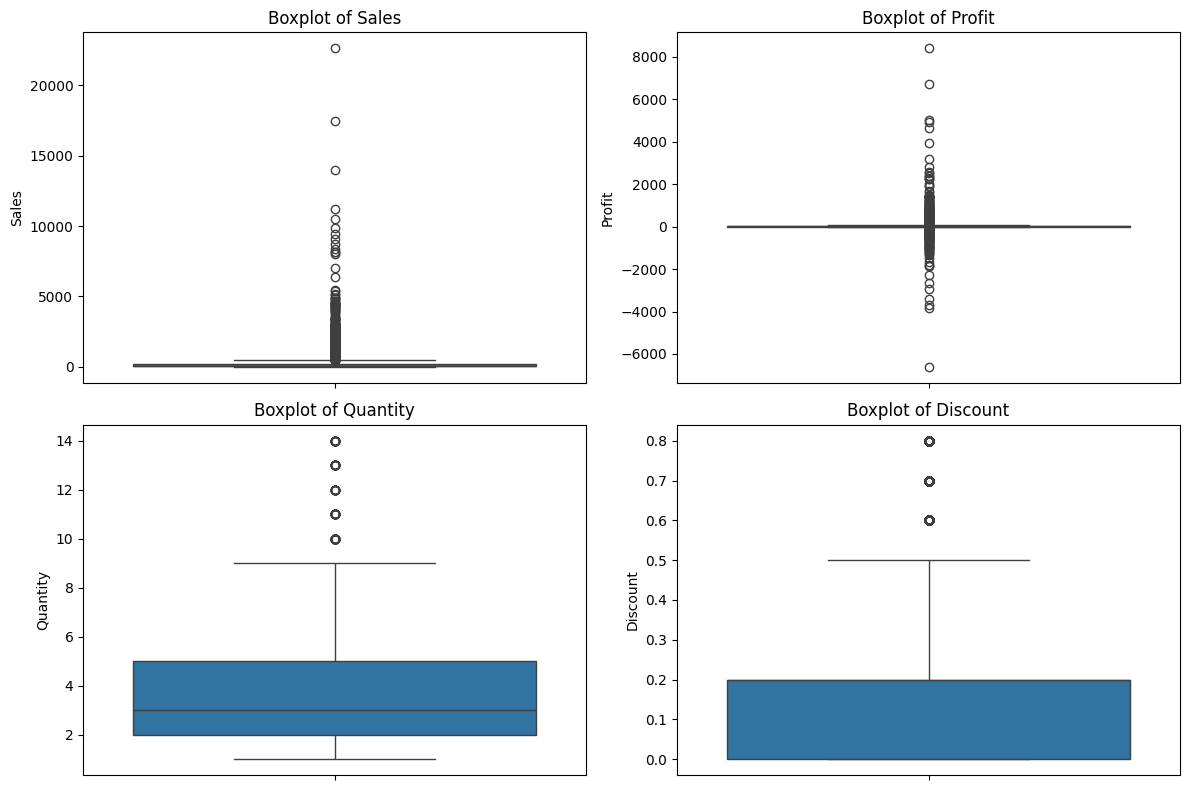

In [24]:
# Summary statistics for numeric columns
df[['Sales', 'Profit', 'Quantity', 'Discount']].describe()

# Optional: visualize with boxplots to identify outliers
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Sales', 'Profit', 'Quantity', 'Discount']

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


## Sumarry for Step 2-3: Dataset Overview & Preparation

The Superstore dataset contains **9994 rows** and **21 columns**, representing customer orders from 2014–2017.  
All columns have non-null values, so **there is no missing data**, making it ready for analysis.

### Column Types
- **Numeric columns:** `Sales`, `Quantity`, `Discount`, `Profit`  
- **Categorical columns:** `Order ID`, `Customer ID`, `Customer Name`, `Segment`, `Country`, `City`, `State`, `Postal Code`, `Region`, `Product ID`, `Category`, `Sub-Category`, `Product Name`, `Ship Mode`  
- **Date columns:** `Order Date`, `Ship Date` (converted to `datetime`)  

### Derived Columns
- `Order_Year` and `Order_Month` → for trend analysis over time  
- `Shipping_Duration` → number of days between order and delivery  

### Numeric Summaries & Outliers

| Column      | Min         | Max         | Mean     | Observation |
|------------|-------------|------------|---------|-------------|
| `Sales`    | 0.44        | 22638.48   | 229.86  | Mostly small/medium orders, a few extremely high-value outliers |
| `Profit`   | -6599.98    | 8399.98    | 28.66   | Mostly positive, some large negative profits indicate losses |
| `Quantity` | 1           | 14         | 3.79    | Most orders small; few bulk orders exist |
| `Discount` | 0.0         | 0.8        | 0.16    | Most discounts low (0–20%), some high discounts up to 80% |

**Implications for analysis:**  
- Outliers in **Sales** and **Profit** may affect ANOVA, regression, and other statistical tests.  
- Large variability in numeric columns will be considered in descriptive analysis and visualizations.  
- Derived date columns allow for time-series analysis.  

**Business Insights:**  
- Negative profits may indicate returns, discounts, or unprofitable sales.  
- High discount orders may or may not correlate with high sales; correlation and regression (Q2 & Q5) will help test that.  
- Understanding column types and distributions helps decide which statistical methods to apply later.

### Conclusion
The dataset is **complete, clean, and structured**, with numeric, categorical, and date columns properly typed.  
- Outliers are identified and noted.  
- Derived columns are ready for trend and duration analysis.  

✅ The dataset is now fully **ready for statistical analysis and visualization**.
